In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def gradient_descent(gradient, x, y, w0, w1, learning_rate=0.0001, threshold=1e-4, max_iter=1000):
    count = 0
    while True:
        grad = gradient(x, y, w0, w1)
        w0_new = w0 - learning_rate * grad[0]
        w1_new = w1 - learning_rate * grad[1]
        # print(w1_new, w0_new)
        if abs(w1_new - w1) < threshold and abs(w0_new - w0) < threshold:
            break
        w0, w1 = w0_new, w1_new
        if count > max_iter:
            print(count)

            break
        count += 1
    return w1, w0

In [14]:
def abs_loss(y_pred, y):
    return np.abs(y_pred - y)

def d_abs_loss(x, y, w_0, w_1):
    y_pred = w_0 + w_1 * x
    grad_w_0 = np.sign(y_pred - y).mean()
    grad_w_1 = (np.sign(y_pred - y) * x).mean()
    return grad_w_0, grad_w_1

In [15]:
data = np.loadtxt('data.csv', delimiter=',')
x = data[:, 0]
y = data[:, 1]

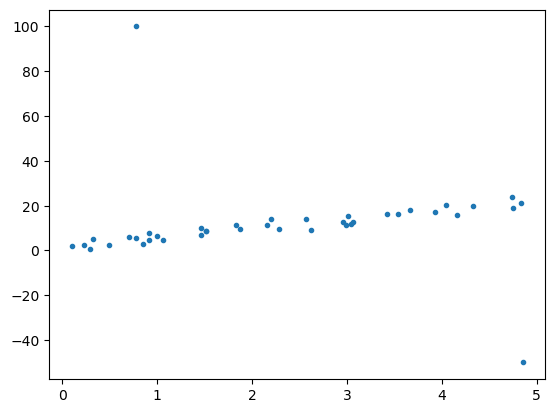

In [16]:
plt.scatter(x, y, marker='.')

In [28]:
# Initialize the weights
w_0 = 0
w_1 = 0

new_w_1, new_w_0 = gradient_descent(d_abs_loss, x, y, w_1, w_0, max_iter=1000000)

# Print the final weights
print("Final weights:")
print("w_0 =", new_w_0)
print("w_1 =", new_w_1)


Final weights:
w_0 = 1.7746000000000444
w_1 = 4.015744499999941


In [29]:
w_0_mse = 11.259
w_1_mse = 0.180

y_pred_mse = w_0_mse + w_1_mse * x
y_pred_abs = new_w_0 + new_w_1 * x

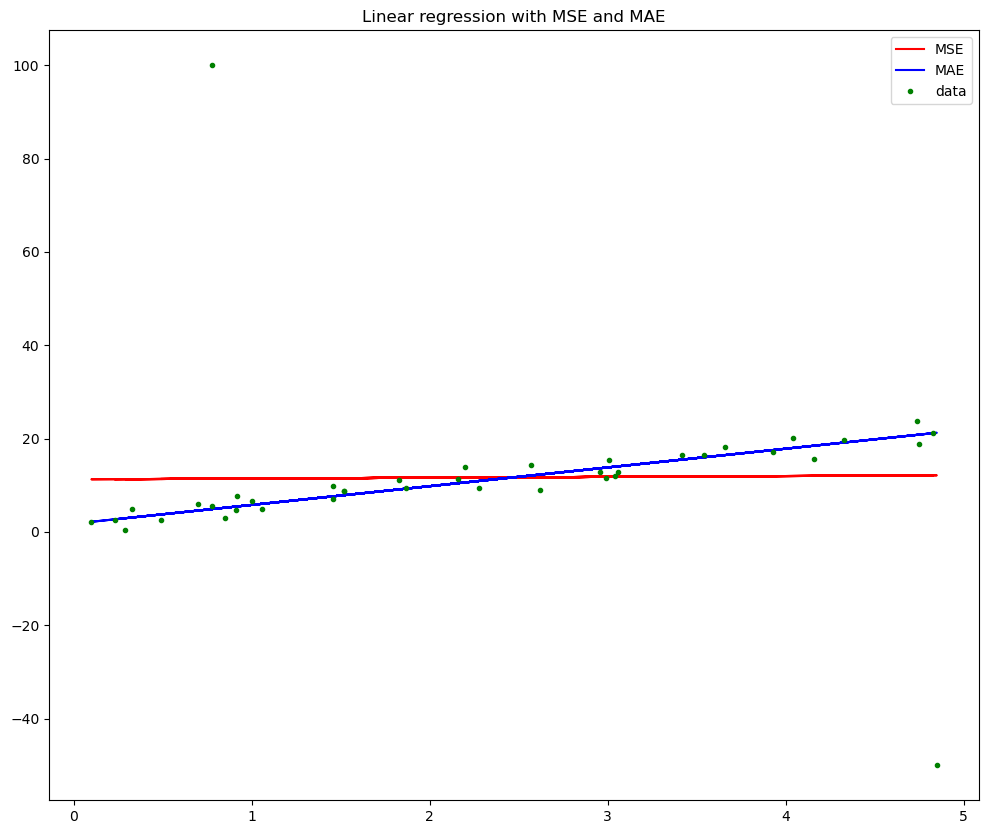

In [30]:
plt.figure(figsize=(12, 10))
plt.plot(x, y_pred_mse, color='red', label='MSE')
plt.plot(x, y_pred_abs, color='blue', label='MAE')
plt.plot(x, y, marker='.', linestyle='none', color='green', label='data')
plt.title('Linear regression with MSE and MAE')
plt.legend()
plt.show()